### Representing real world data using tensors
In this chapter we would deal with different kinds of data in the real world : Images, Text, Time-Series, Tabular etc.

#### Working with Images
1. Images are represented as 2D(rows, columns) Scalar value matrices (grayscale) or 3D (color/channel, rows, columns) scalar value matrices (RGB/BRG).
2. In user cameras they scalars are 8-bit encoded scalars, but for medical images is might be required to use higher precision such as 12-bit or 16-bit data where the pixel encodes info about a physical quantiy like bone density, temperature etc.

##### Loading an Image file
1. Images come in different files and formats. Here we load the image with the `imageio` module because it provides a consitent API for loading different kinds of formats. It loads the image in a numpy array-like object. We could also use `Torchvision` for consistency with the pytorch library.
2. Anything that is numpy array can be made into tensors by pytorch. We just have to make sure that the layout is consistent with the pytorch API because it requires the layout to be (Channels, Height, Width).

In [2]:
# Lets import the imageio module and read an image
import imageio

img = imageio.imread("C:/Users/Anant/Desktop/accident image.jpg")
print(img.shape)

(341, 626, 3)


We can see that the loaded image's shape is (height,width,channels) format, so for it to be consistent with the pytorch API what we can do is that we use the permute method of the tensor (after converting the image to a tensor) to make the layout consistent.

In [3]:
import torch
img_tensor = torch.from_numpy(img)

# The (2,0,1) is the dimension of the original image that is being shuffled. So the 2nd dim should now be first i.e channels will be first
img_corrected = img_tensor.permute(2,0,1)
print(img_corrected.shape)

torch.Size([3, 341, 626])


As we have seen previously out does not cause a change in the storage data of the image. It just adjust the stride, size and offset of the existing storage. This conversion is cheap because we are not allocating the data again just the view is changing. But changing the pixel value of the tensor will change the value of the storage and vice-versa.\
An changing the pixel value in `img` will also change the value in `img_tensor` and `img_corrected`.\
`We store a bunch of images as a batch of N images in the form of  N x C x H x W`

##### Normalizing the Inputs
Neural Networks typically exhibit the best performance when the data is between -1 to 1.
1. One solution is to divide the values of each batch of images by 255, the largest value that can be recorde in a 8-bit integer and convert the data type of the tensor to float.
2. Second would be to calculate the mean of the whole batch of input data and scale it so that the output has zero mean and unit standard deviation across each channel.

In [4]:
# Method 1 : Normalizing by dividing with 255.0
img_corrected = img_corrected.float()
img_corrected = img_corrected/255.
print(img_corrected)
img_corrected.shape

tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.9961],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961]],

        [[0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.9961],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961]],

        [[0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 0.9961, 0.

torch.Size([3, 341, 626])

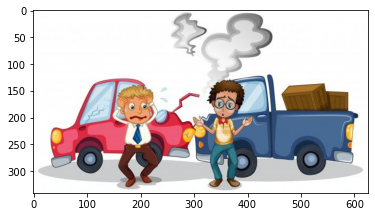

In [5]:
# Method 2: Normalizing by mean and standard deviation
import matplotlib.pyplot as plt
img_corrected_channel = img_corrected.permute(1,2,0).numpy()
plt.imshow(img_corrected_channel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


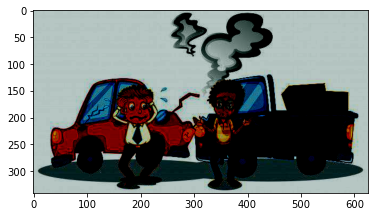

In [6]:
mean = torch.mean(img_corrected, dim=(1,2))
std = torch.std(img_corrected, dim = (1,2))
for c in range(3):
    img_corrected[c,:,:] = (img_corrected[c,:,:]-mean[c])/std[c]
plt.imshow(img_corrected.permute(1,2,0).numpy())

In [7]:
channels = img_corrected.shape[0]
for c in range(channels):
    mean = torch.mean(img_corrected[c])
    std = torch.std(img_corrected[c])
    img_corrected[c] = (img_corrected[c] - mean)/std
print(img_corrected)

tensor([[[0.7030, 0.7030, 0.7030,  ..., 0.7167, 0.7030, 0.7030],
         [0.7030, 0.7030, 0.7030,  ..., 0.7167, 0.7030, 0.7030],
         [0.7030, 0.7030, 0.7030,  ..., 0.7167, 0.7030, 0.7030],
         ...,
         [0.7167, 0.7167, 0.7167,  ..., 0.7167, 0.7030, 0.7030],
         [0.7167, 0.7167, 0.7167,  ..., 0.7167, 0.7030, 0.7030],
         [0.7167, 0.7167, 0.7167,  ..., 0.7167, 0.7030, 0.7030]],

        [[0.7674, 0.7674, 0.7674,  ..., 0.7803, 0.7674, 0.7674],
         [0.7674, 0.7674, 0.7674,  ..., 0.7803, 0.7674, 0.7674],
         [0.7674, 0.7674, 0.7674,  ..., 0.7803, 0.7674, 0.7674],
         ...,
         [0.7803, 0.7803, 0.7803,  ..., 0.7803, 0.7674, 0.7674],
         [0.7803, 0.7803, 0.7803,  ..., 0.7803, 0.7674, 0.7674],
         [0.7803, 0.7803, 0.7803,  ..., 0.7803, 0.7674, 0.7674]],

        [[0.7541, 0.7541, 0.7541,  ..., 0.7673, 0.7541, 0.7541],
         [0.7541, 0.7541, 0.7541,  ..., 0.7673, 0.7541, 0.7541],
         [0.7541, 0.7541, 0.7541,  ..., 0.7673, 0.7541, 0.

In [8]:
img_corrected.shape

torch.Size([3, 341, 626])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


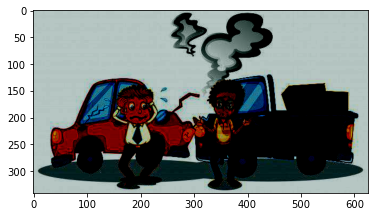

In [9]:
plt.imshow(img_corrected.permute(1,2,0).numpy())

[[254 254 254 ... 255 254 254]
 [254 254 254 ... 255 254 254]
 [254 254 254 ... 255 254 254]
 ...
 [255 255 255 ... 255 254 254]
 [255 255 255 ... 255 254 254]
 [255 255 255 ... 255 254 254]]
(341, 626, 3)


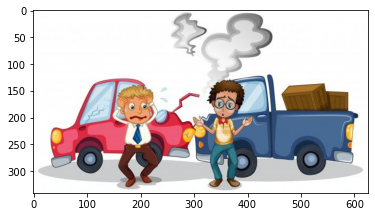

In [10]:
new_img = imageio.imread("C:/Users/Anant/Desktop/accident image.jpg")
print(new_img[:,:,2])
print(new_img.shape)
plt.imshow(new_img)

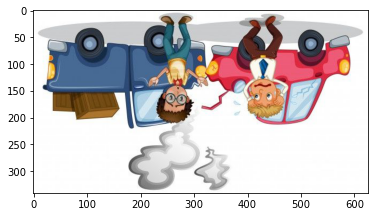

In [11]:
# this operation make the loaded image inverted because we are indexing the height and width dimension as reverse.
n = new_img[::-1, ::-1, :3]
plt.imshow(n)

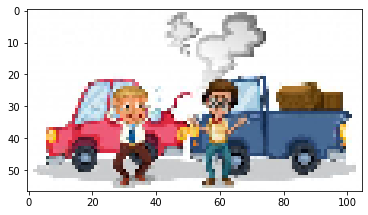

In [12]:
# this operation makes the image smaller, but if we make the image too small then it will get pixelated.
# what is being done here is that we are taking every 6th pixel value from the full image. So the image becomes pixelated.
n = new_img[::6, ::6, :3]
plt.imshow(n)

202.7544620689009 72.89831106528723
194.8658006427253 77.0606649419862
196.8763831242446 75.74708437992854
(341, 626, 3)


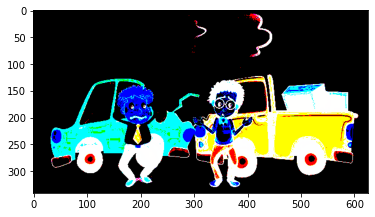

In [13]:
import numpy as np
for c in range(channels):
    mean = new_img[:, :, c].mean()
    std = new_img[:, :, c].std()
    print(mean, std)
    new_img[:, :, c] = (new_img[:, :, c]-mean)/std
print(new_img.shape)
plt.imshow(new_img)

In [14]:
import numpy as np
for c in range(channels):
    mean = np.mean(new_img, axis=(0,1))
    std = np.std(new_img, axis = (0,1))
    print(mean.shape, std.shape)
    new_img[:,:,c] = (new_img[:,:,c]-mean)/std
print(new_img.shape)
plt.imshow(new_img)

(3,) (3,)


ValueError: operands could not be broadcast together with shapes (341,626) (3,) 

(3,)
[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]]
[202.75446207 194.86580064 196.87638312]


TypeError: Invalid shape (3,) for image data

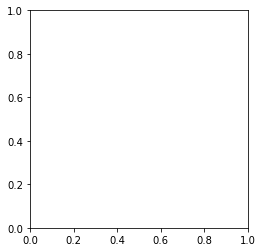

In [ ]:
# Now we will sum the values for all the 3 channels and then see how the image looks like.
import numpy as np
n = np.mean(new_img, axis = (0,1))
print(n.shape)
print(new_img)

print(n)
plt.imshow(n)

In [ ]:
new_img = imageio.imread("C:/Users/Anant/Desktop/accident image.jpg")

[[[0.99215686 0.87058824 0.8627451 ]
  [0.86666667 0.76862745 0.40784314]]

 [[0.41176471 0.82352941 0.58823529]
  [0.64705882 0.54901961 0.5254902 ]]]
(2, 2, 3)
float64


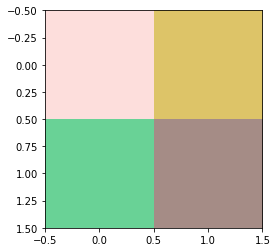

In [ ]:
new_img = [[[253.0,222.0],
            [220.0,221.0]],
            [[196.0,104.0],
            [105.0,210.0]],
            [[150.0,165.0],
            [140.0,134.0]]]
new_img = (np.array(new_img).reshape(2,2,3)/255.0).astype(np.float64)
print(new_img)
print(new_img.shape)
plt.imshow(new_img)
print(new_img.dtype)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.72941176 0.75294118 0.59607843] [0.22110832 0.12313975 0.16702384]
[[[ 1.18830942  0.95539463  1.59657848]
  [ 0.62075865  0.12738595 -1.12699657]]

 [[-1.43661288  0.57323678 -0.04695819]
  [-0.37245519 -1.65601736 -0.42262372]]]
new_mean : [2.77555756e-16 2.77555756e-16 1.80411242e-16] 
new_std : [1. 1. 1.] 


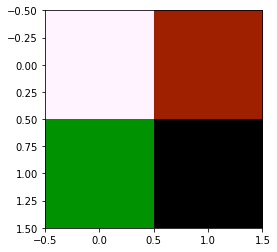

In [ ]:
# calculate the statistics of the image
mean = np.mean(new_img, axis = (0,1))
std = np.std(new_img, axis = (0,1))
print(mean, std)
# Now we will normaliza the image per channel i.e we will take the image and subtract the mean of that channel and divide by std.
for c in range(3):
    new_img[:,:,c] = (new_img[:,:, c]-mean[c])/std[c]

plt.imshow(new_img)
print(new_img)

print(f"new_mean : {np.mean(new_img, axis = (0,1))} ")
print(f"new_std : {np.std(new_img, axis = (0,1))} ")

##### Working with 3D images : Volumetric Data
3D images are produces primarily in the medical imaging fiels such as CT-scans.
1. Here we see images stacked across the head to foot axis where each slice is a 2D image across the Human body. The slices are generated in such a way that, when the x-ray passes through the body then the intensity in the CT-Scan represents the density of different parts of the body, such as lungs, cartilages, organs , water, bones in the order of increasing density. Where the `less dense` portions are `darker` and `more dense` portions are `brighter`.
2. The density at each point of the image is computed by the amount of X-rays reaching the detector after passing through human body, with some complex math done to deconvolve and reconstruct the raw sensor data into a full volume.
3. CT-Scans often have a single intensity channel like a grayscale image rather than the RGB image. So the channel dimension is left out of the images in data representation.
4. So by stacking the individual 2D slices into a 3D tensor we can build a volumetric data representation of the anatomy of the subject.
5. The extra dimension represents an offset in the physical space rather than a particular band of the visible spectrum (RGB).
6. So for representing the dimensions of volumetric data we can just add a `Depth` dimension to image representation resulting in `( N x C x D x H x W )` i.e `(Batch, Channels, Depth, Height, Width)` which makes it a 5D tensor.

`Now lets view a DICOM (Digital imaging and Communications in Medicine) file. Here we will use the volread() function of the imageio library which converts it into a series of 3D numpy arrays.`

In [15]:
ct_img = imageio.volread("C://Users/Anant/Downloads/ct_image.dcm", format='DICOM')
ct_img

Reading DICOM (examining files): 1/335 files (0.318/335 files (5.4%24/335 files (7.2%30/335 files (9.0%35/335 files (10.439/335 files (11.643/335 files (12.848/335 files (14.352/335 files (15.559/335 files (17.6155/335 files (46.3%269/335 files (80.3%335/335 files (100.0%)
  Found 1 correct series.


Array([[-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       ...,
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024]], dtype=int16)

In [16]:
ct_img.shape

(512, 512)

torch.Size([1, 512, 512])


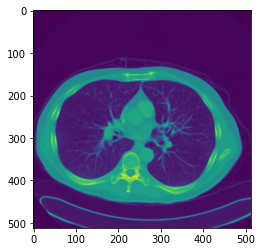

In [21]:
new_image = torch.from_numpy(ct_img).unsqueeze(0)
print(new_image.shape)
plt.imshow(ct_img)

#### Working with Tabular data
Tabular data is comprised of data in the form of rows and columns.
1. When working with tabular data what we can assume that the data is not homogeneous. Because lets say that we have fruits data. The rows represent the fruits while the columns represent the features of the fruits such as colr, height, width. So `colors` are labels which would be in `string` format and `height and width` are `numbers` which would be in `float` or `int` format. 
2. But because pytorch tensors can house only homogeneous data. So data formats other than floats, int and bools need to be changed to these formats.
3. Pytorch tensors are made homogeneous because Neural Networks perform calculation of real numbers and give out an output of real numbers. So any other method of feature representation other than floats, int's or bools is not required.
4. We can download a wine dataset from kaggle or online and then we can load the data using any library. Here as we are well versed with numpy we can load it using numpy. Then as numpy and pytorch have a decent interoperability, we can convert them to tensors.
5. For the wines dataset we also have the scores for each wine based on their features. We can put the scores in the seperate tensor as both continuous variable(to calculate in a regression task) or a categorical variable(for a classification task).
6. If we are using continuous variables then we can just convert the ratings of the wines dataset to integers and we would have a tensor of continuous target variables. If we want to convert them into categorical variables we could use an encoding-method known as one-hot encoding.
7. The tensor `tensor.scatter_(arg_1, arg_2, arg_3)` function can convert a tensor to one-hot encoded variables. It takes 3 arguments:
    1. arg_1 : A scatter dimension indicating the dimension in which the following arguments will be specified.
    2. arg_2 : A column tensor whose elements need to be . 
    3. arg_3 : A tensor containing elements to scatter or a scalar to scatter (1 in this case).
8. `Pytorch allows us to directly use classes as targets when training neural networks, but if we want to use continuous variables as categorical variables we will have to convert to a one-hot tensor.`
9. For ordinal variables there is no set method to encode it. We can use them as categorical as well as continuous variables depending upon the situation. If we want to preserve the ordering property of the ordinal variables then use them as continous variables. If there are a few classes and we do not want to preserve the ordering of the classes then we can use them as categorical variables.

##### Working with Time-Series data
Time-Seires data is the one where the data values are different in different instances of time. Such as weather sensor data which is transferring different observations of temperature, pressure, rainfall in different times of the day.
Here we will be working with a bike sharing service dataset which records the number of bikes rented on a daily and hourly basis.

In [3]:
import pandas as pd
import numpy as np
import torch

In [4]:
path = "D://Datasets/bike-sharing-dataset/hours-fixed.csv"
data = pd.read_csv(path)
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17516,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17517,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17518,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17520 non-null  int64  
 1   dteday      17520 non-null  object 
 2   season      17520 non-null  int64  
 3   yr          17520 non-null  int64  
 4   mnth        17520 non-null  int64  
 5   hr          17520 non-null  int64  
 6   holiday     17520 non-null  int64  
 7   weekday     17520 non-null  int64  
 8   workingday  17520 non-null  int64  
 9   weathersit  17520 non-null  int64  
 10  temp        17520 non-null  float64
 11  atemp       17520 non-null  float64
 12  hum         17520 non-null  float64
 13  windspeed   17520 non-null  float64
 14  casual      17520 non-null  int64  
 15  registered  17520 non-null  int64  
 16  cnt         17520 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data['dteday']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17515    2012-12-31
17516    2012-12-31
17517    2012-12-31
17518    2012-12-31
17519    2012-12-31
Name: dteday, Length: 17520, dtype: object

In [7]:
data['dteday'] = data['dteday'].apply(lambda x : np.float32(x[5:7]))
data['dteday']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
17515    12.0
17516    12.0
17517    12.0
17518    12.0
17519    12.0
Name: dteday, Length: 17520, dtype: float32

In [8]:
data.rename(columns={'dteday':'day'}, inplace = True)
data

,instant,day,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1.0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1.0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1.0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1.0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1.0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17375,12.0,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17516,17376,12.0,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17517,17377,12.0,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17518,17378,12.0,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Now we can see that the data is organized in the form which shows us the number of bikes sold by the hour per day. In a time-series dataset like this one the rows represent successive time-points : This is the dimension along which they are ordered. Sure we can treat each row as independent and try to predict the number of circulating bikes, say on a particular time of the day, but the ordering of the data like a time-series could help us to find causal relationships over time. For instance it allows us to predict bike rides at one time, depending on whether it was raining before or not. But for now we will focus on converting our data into a format that is understood by Neural Networks.\
`This model here would get N sequence of parallel inputs with C channels or features. The N dimension represents the time axis i.e 1 entry per hour.`

In [9]:
# Now we will convert the dataframe to a numpy array.
data_array = data.to_numpy(dtype=np.float32)
data_tensor = torch.from_numpy(data_array)
data_tensor

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 1.2000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 1.2000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 1.2000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In some cases we might want to split our dataset (which is currently divided by the hour) into a 1 day time-period. The the shape of our dataset would change into `N x C x L` where L is 24 for the 24 hours of the day. But remember that for this to make sense we should not have Gaps in our time-series.

1. Now we can use the tensor.view to generate a view of out transformation and see how the tensor looks like.
2. tensor.view() does not change the underlying representation of the storage.
3. view requires us to provide a new shape for the returned tensor.
4. The -1 is a placeholder which says that infer the dimensions which come before the ones that we have provided based on the overall shape i.e if the overall there are 6 elements in a tensor, and we want to reshape it such that it should have 2 columns and we want pytorch or numpy to infer how to arrange the 6 elements so that we have 2 columns and figure out the number of rows on it's own, then we pass on -1 in the place of the rows and pytorch thinks like x * 2 = 6, then it finds x which is 3 and puts that inplace of -1. So now the of the resultant tensor is `3 x 2`. Conversly if we give out the 1st dimentsion as 2 and put -1 inplace of 2nd dimension then it infers 3 as the second dimension and now the tensor is `2 x 3`.


In [10]:
x = torch.tensor([1,2,3,4,5,6])
print(x.shape)
y = x.view(-1, 2) # here -1 is the placeholder for the 1st dimension for pytorch to infer.
print(y.shape)    # This should create a tensor of (3, 2).

b = x.view(2, -1)
print(b.shape)    # This should create a tensor of (2, 3).

c = x.view(2, 3, -1)
print(c.shape)    # This should create a tensor of (2, 3, 1) as 2 x 3 x 1 = 6

torch.Size([6])
torch.Size([3, 2])
torch.Size([2, 3])
torch.Size([2, 3, 1])


In [11]:
daily_bikes = data_tensor.view(-1, 24, data_tensor.shape[1]) # as the data is of 17520 elements. The -1 would be inferred from the total dimensions
print(daily_bikes.shape, daily_bikes.stride())

torch.Size([730, 24, 17]) (24, 1, 17520)


We can see that the rightmost is the number of columns i.e 17, then we can also see that the middle dimension is the number of hours of the day. So we have `N sequences` of `L hrs` in a day for `C channels`. So we have a `N x L x C` ordering of elements. But now we need to have the `N x C x L` ordering so we need to reshape the tensor or transpose the 1st and 2nd dimension.

In [12]:
daily_bikes = daily_bikes.transpose(1,2)
print(daily_bikes.shape, daily_bikes.stride())

torch.Size([730, 17, 24]) (24, 17520, 1)


Now we have an ordinal variable called as 'weather situation' which represents the weather. 1 is for good, 4 is for really bad. We need to convert it to categorical variables. So we will use one-hot encoding. Here we will initalize a zero-filled matrix filled with number of rows equal to the number of hours in a day and the number of columns equal to the number of number of weather situations i.e 4

In [15]:
first_day = data_tensor[:24].long()
weather_onehot = torch.zeros(bikes.shape[0], 4)
first_day[:, 9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

Then we scatter our data which we have taken for the first day and divided it into 24 hrs to the weather_onehot tensor that we created. We would subtract 1 from each of the elements to start the numbering of categorical values from zero.

In [17]:
weather_onehot.scatter_(dim = 1, index = first_day[:,9].unsqueeze(1).long()-1, value = 1)
weather_onehot

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [18]:
# lastly we will concatenate out weather_onehot tensor with our dataset. we will use torch.cat for this
torch.cat((data_tensor[:24], weather_onehot), 1 ) [:1]   # The 1 in the cat method is the dimension along which we are concatenating.

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

##### Representing text data
Previously NLP alogrithms had rules encoding grammar, but now the state of the art models train deep RNN's on a large corpora of data and allow those rules to emerge from data. Our job is convert the text into something which a Neural Network will understand and then we would chose the rigth architecture to perform our task. 
1. There are two particularly intuitive levels by which NN operate on text data. First is the character level and the second is the word level. The encoding of characters or words is not different fundametally. It is just one-hot encoding.
2. We have a vast amount of text data on the internet ranging from books to articles. We will download the wat_and_peace book and work with that.
3. `One important concept we need to remember here is the concept of encoding. Encoding is representing a word or anything in a laguage understood by computers. One such form of encoding is ASCII. It encodes all the unique characters into an 8 bit format of 0's and 1's. This was useful when the characters were lesser in number but now we have unicode encodings which represents a wider range of characters and takes up 8,16, or 32 bits.`
4. `When we are encoding out characters it is instrumental to load our text in an encoding to a character set which is useful for the text being analyzed. In our case since we loaded the english text we can get away with ASCII encoding.`
5. Now we will pass in the text and generate our encodings. Each character will be represented by a vector which will be of the length of the number of unique characters in the encoding with all elements of the vector as zeros except 1, which will be be set as 1 at the index corresponding to the character.
6. One-hot encoding for words in a text can be done in the same way. Just find the number of unique words in the text make a vector of that length, now put zeros at all the elements position which are not that word and 1 at the index of that word. This way we can one-hot encoding of words.
7. The choice between character and words leaves us with a trade-off. In many languages there are fewer characters than words and in many practical applications we often see words which are not in the dictionary. So we have to make a choice because words convey much more meaning than individual characters in a sentence, so words can be much more informative by itself.
8. Due to this stark contrast intermediate methods have been sought which take advantage of both of the methods. `They use character level encodings in the beginning and add the most frequently occuring words until we reach a predefined vocabulary size. This is known as Byte-pair encoding.`
```
?Im|pos|s|ible|,|?Mr|.|?B|en|net|,|?impossible|,|?when|?I|?am|?not|?acquainted|?with|?him
```

##### Text Embeddings
Word embeddings are great when used for a smaller body of text but when the text size increases they are not very good at representation, beacuse the present, past, future tenses of words are unique and multiple other intricacies of languages. This makes them less feasible for a large corpora of text. What we need is another way to represent these words such that the present,past and future tense of the words are condensed into a single token, condense alternate spellings etc. \
How can we compress our large one-hot vecor of word embeddings into a more manageable size. The technique is represent each word as a vector or length 100 with 100 floating point values. So for another word this vector would be different with a different set of floating point values. This way we could map a very large number of words in an effective way without exploding the size of our vector. This is known as `embedding`.
1. `In principle we could iterate over our vocabulary of words and generate 100 floating point vectors for each word, but this forego the difference / distance between two words based on meaning or context.`
2. `An ideal scenario would be to generate embeddings such that words with similar context would be mapped with similar embeddings and less distance between each other in the embedding space i.e conceptually similar words would be mapped in the similar space. For e.g dog, cat would share similar embeddings because they are all animals.`
3. There are different algorithms to generate word embeddings through Neural Networks which try to predict a word from a nearby word in a sentence. In this case we could start of with one-hot encoded embeddings and use a rather shallow Neural Network to generate word embeddings which could be used as an input to the network to generate word embeddings.
4. One interesting thing  about embeddings is that not only words with similar context are clustered together but we can also form consistent spatial relationships with other words. For eg. If we perform arithemetic operations on the vectors of `King - man + woman` we would get a word similar to `Queen`.
5. Embeddings are an essential tool when a large number of words are to be represented by numberic vectors. They are used whenever one-hot encoding becoems cumbersome.
6. In non-text application we would not prepare embeddings beforehand but rather we would make them as learnable parameters while training the network.